In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [138]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  2


In [139]:
# データの読み込み
data = pd.read_csv('../data/preprocessed_data.csv')

# 特徴量とターゲット変数の分割
X = data.drop('dengue', axis=1).values
y = data['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
X_train.shape

(3508, 13)

In [141]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [142]:
with strategy.scope():
    # モデルの定義
    model = Sequential()

    # 入力層および隠れ層
    model.add(Dense(128, activation='relu', input_dim=13))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))

    # 出力層（シグモイド活性化関数を使用）
    model.add(Dense(1, activation='sigmoid'))

    # モデルのコンパイル
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [143]:
# モデルのトレーニング
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history=model.fit(X_train, y_train, epochs=200,validation_split=0.1, batch_size=64,callbacks=[early_stopping])

Epoch 1/200


2024-10-03 15:37:51.111420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [3157]
	 [[{{node Placeholder/_11}}]]
2024-10-03 15:37:51.111767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [3157]
	 [[{{node Placeholder/_11}}]]


50/50 [==============================] - ETA: 0s - loss: 0.7582 - accuracy: 0.4767

2024-10-03 15:37:54.160552: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [351]
	 [[{{node Placeholder/_11}}]]
2024-10-03 15:37:54.160896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [351]
	 [[{{node Placeholder/_11}}]]


50/50 [==============================] - 3s 19ms/step - loss: 0.7582 - accuracy: 0.4767 - val_loss: 0.6870 - val_accuracy: 0.5556
Epoch 2/200
50/50 [==============================] - 1s 12ms/step - loss: 0.7255 - accuracy: 0.5150 - val_loss: 0.6815 - val_accuracy: 0.5584
Epoch 3/200
50/50 [==============================] - 1s 13ms/step - loss: 0.7219 - accuracy: 0.4888 - val_loss: 0.6789 - val_accuracy: 0.5442
Epoch 4/200
50/50 [==============================] - 1s 13ms/step - loss: 0.7026 - accuracy: 0.5271 - val_loss: 0.6776 - val_accuracy: 0.5442
Epoch 5/200
50/50 [==============================] - 1s 13ms/step - loss: 0.7101 - accuracy: 0.5173 - val_loss: 0.6763 - val_accuracy: 0.5527
Epoch 6/200
50/50 [==============================] - 1s 13ms/step - loss: 0.6950 - accuracy: 0.5458 - val_loss: 0.6750 - val_accuracy: 0.5470
Epoch 7/200
50/50 [==============================] - 1s 13ms/step - loss: 0.6912 - accuracy: 0.5401 - val_loss: 0.6738 - val_accuracy: 0.5499
Epoch 8/200
50/50 

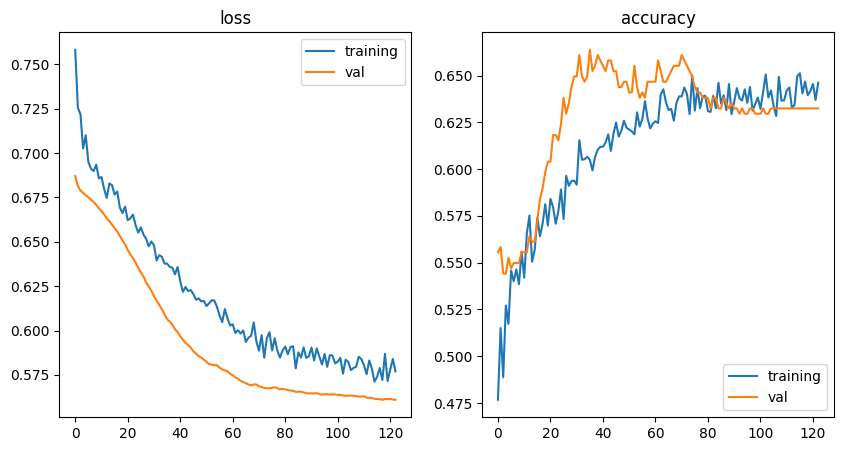

In [144]:
metrics = ['loss', 'accuracy']  # 使用する評価関数を指定

plt.figure(figsize=(10, 5))  # グラフを表示するスペースを用意

for i in range(len(metrics)):

    metric = metrics[i]

    plt.subplot(1, 2, i+1)  # figureを1×2のスペースに分け、i+1番目のスペースを使う
    plt.title(metric)  # グラフのタイトルを表示
    
    plt_train = history.history[metric]  # historyから訓練データの評価を取り出す
    plt_test = history.history['val_' + metric]  # historyからテストデータの評価を取り出す
    
    plt.plot(plt_train, label='training')  # 訓練データの評価をグラフにプロット
    plt.plot(plt_test, label='val')  # テストデータの評価をグラフにプロット
    plt.legend()  # ラベルの表示
    
plt.show()  # グラフの表示

In [145]:
test_loss, test_acc = model.evaluate(X_test, y_test)

2024-10-03 15:39:14.261886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [878]
	 [[{{node Placeholder/_11}}]]
2024-10-03 15:39:14.262266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [878]
	 [[{{node Placeholder/_11}}]]


28/28 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.6526
